###1. Importing the Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip '/content/drive/MyDrive/Course-Project_Group8-master.zip'

In [3]:
#!unzip '/content/drive/MyDrive/Course-Project_Group8-master.zip'

In [4]:
!unzip '/content/drive/MyDrive/IR/IR Project/Datasets/DER_Data.zip'

Archive:  /content/drive/MyDrive/IR/IR Project/Datasets/DER_Data.zip
   creating: content/processed_data/
   creating: content/processed_data/test/
   creating: content/processed_data/test/depression/
 extracting: content/processed_data/test/depression/117.jpg  
 extracting: content/processed_data/test/depression/253.jpg  
 extracting: content/processed_data/test/depression/199.jpg  
 extracting: content/processed_data/test/depression/31.jpg  
 extracting: content/processed_data/test/depression/236.jpg  
 extracting: content/processed_data/test/depression/260.jpg  
 extracting: content/processed_data/test/depression/95.jpg  
 extracting: content/processed_data/test/depression/174.jpg  
 extracting: content/processed_data/test/depression/195.jpg  
 extracting: content/processed_data/test/depression/247.jpg  
 extracting: content/processed_data/test/depression/61.jpg  
 extracting: content/processed_data/test/depression/172.jpg  
 extracting: content/processed_data/test/depression/284.jp

In [5]:
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
import os
import random
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2. Split to Train and Test Data Set Ratio - 80%-20% ( For CSV Data File ). The Data is now being loaded from the directories generated in the format for loading the Data through the Image Data Generator.

In [9]:
import tensorflow as tf

In [10]:
print(tf.__version__)

2.11.0


In [11]:
from keras import backend as K


In [12]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dropout,Activation
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [13]:
from tensorflow.keras.applications import ResNet50

###2. Generating the Data Sets
The Train, Validation and Test Data Sets in the ratio of 80:20 as the Training Dataset and Test Data split and further the Training Set is split in the ratio of 80:20 in Training and Validation Data Set.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
Train_Datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)
Valid_Datagen = ImageDataGenerator(rescale = 1./255,validation_split = 0.2)

Test_Datagen  = ImageDataGenerator(rescale = 1./255)

In [15]:
Train_Data_Itr = Train_Datagen.flow_from_directory(directory = r'/content/content/processed_data/train',
                                                   target_size = (128,128),
                                                   class_mode = 'binary',
                                                   subset = 'training',
                                                   batch_size = 32)

Found 1583 images belonging to 2 classes.


In [16]:
Valid_Data_Itr = Valid_Datagen.flow_from_directory(directory = r'/content/content/processed_data/train',
                                                  target_size = (128,128),
                                                  class_mode = 'binary',
                                                  subset = 'validation',
                                                  batch_size = 32)

Found 395 images belonging to 2 classes.


In [17]:
Test_Data_Itr = Test_Datagen.flow_from_directory(directory = r'/content/content/processed_data/test',
                                                  target_size = (128,128),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 495 images belonging to 2 classes.


In [18]:
# Define the Datasets, corresponding to the given iterators used to fit the model with the given models and validate the result.
train_Dataset = Train_Data_Itr
valid_Dataset = Valid_Data_Itr
test_Dataset = Test_Data_Itr 

###3. Visualizing the Data Distribution and Samples across the Datasets

In [19]:
# Get the labels through the Train_Data_Iterator to know the key values being used by the given iterator.
Train_Labels = Train_Data_Itr.class_indices.keys()

In [20]:
print(Train_Labels)

dict_keys(['depression', 'not_depressed'])


In [21]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

In [22]:
# Get all the Labels for each training examples in the Train Dataset
train_labels = Train_Data_Itr.classes
test_labels = Test_Data_Itr.classes
val_labels = Valid_Data_Itr.classes

In [23]:
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(1583,)
(495,)
(395,)


In [24]:
print(train_labels)
print(test_labels)
print(val_labels)

[0 0 0 ... 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

In [25]:
train_df = pd.DataFrame(train_labels, columns = ['Label'])
test_df = pd.DataFrame(test_labels, columns = ['Label'])
val_df = pd.DataFrame(val_labels, columns = ['Label'])

<Axes: xlabel='Label', ylabel='count'>

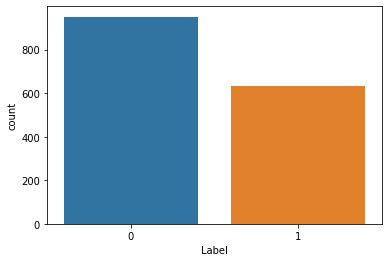

In [26]:
sns.countplot(x=train_df['Label'],data=train_df)

<Axes: xlabel='Label', ylabel='count'>

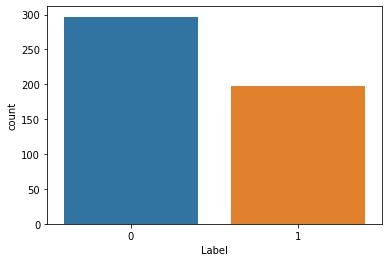

In [27]:
sns.countplot(x=test_df['Label'],data=test_df)

<Axes: xlabel='Label', ylabel='count'>

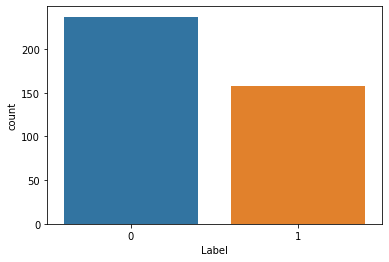

In [28]:
sns.countplot(x=val_df['Label'],data=val_df)

###. 4. Dataset Images Visualisation for both the categories.

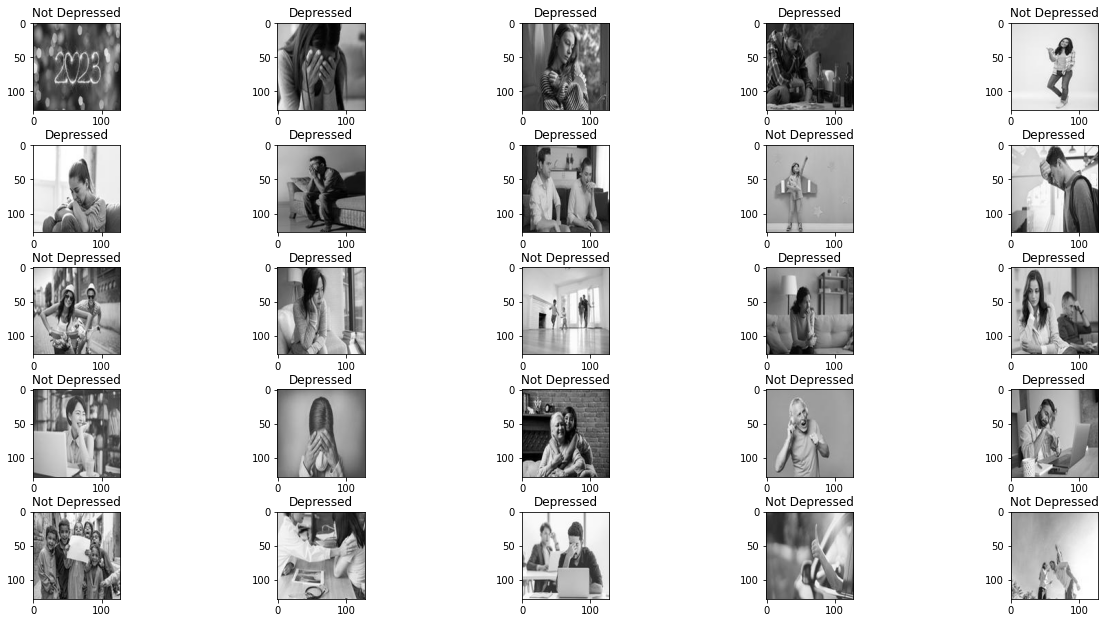

In [30]:
rows = 5
columns = 5
# Get the Plot for 5 Rows and 5 Columns
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        # Get the next image in the batch ( Get the cth Image - As the batch size is 64, hence here we consider only a single batch.)
        data_batch = Train_Data_Itr.next()
        # Get the image ----- Convert to numpy array to view the image.
        image = data_batch[0][c]
        img = np.array(image)
        # Get the Label
        #label = label_batch[0]
        # Plot the Image
        axes[r,c].imshow(img)
        if data_batch[1][c]==1.0:
            txt = 'Not Depressed'
        else:
            txt = 'Depressed'
        axes[r,c].title.set_text(txt)
        # Set the title for the image
# Set the Size of the Figure.
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
fig.set_size_inches(20,10)

7. Defining the Evaluation Metrics as Accuracy, Loss, Precision, Recall and F-1 Score and Set the Hyper-Parameters.

In [31]:
# Define the F-1 Score as Evaluation Metric
# Reference - 
def get_f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [32]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        get_f1_score
]

In [33]:
# Reduce learning rate when a metric has stopped improving.
# Often waits for patience no. of Epochs before reducing the Learning Rate.
# Recue the Learning Rate by 'factor'/.
lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,verbose = 1,factor = 0.50, min_lr = 1e-10)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=1, patience=10)

In [34]:
tf.keras.optimizers.SGD(learning_rate=0.0001, name="SGD")

###5. Defining the Models

### MODEL-1 ( General Deep Convolutional Neural Network )

In [35]:
# Defining the Basic Model-1 as Deep CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

### Model - 2 ( ResNet50, Pre-Trained on ImageNet - Use Transfer Learning )

In [36]:
# Use ResNet
base_model = tf.keras.applications.ResNet50(input_shape=(128,128,3),include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [37]:
# Freezing Layers
for layer in base_model.layers[:-4]:
    layer.trainable=False

In [38]:
modelRes=Sequential()
modelRes.add(base_model)
modelRes.add(Dropout(0.5))
modelRes.add(Flatten())
modelRes.add(BatchNormalization())
modelRes.add(Dense(32,kernel_initializer='he_uniform'))
modelRes.add(BatchNormalization())
modelRes.add(Activation('relu'))
modelRes.add(Dense(1,activation='sigmoid'))

In [39]:
modelRes.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 batch_normalization (BatchN  (None, 32768)            131072    
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                1048608   
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

### Model - 3 ( VGG19, Pre-Trained on ImageNet - Use Transfer Learning )

In [40]:
#print(modelVGG.summary())

In [41]:
vgg19 = tf.keras.applications.VGG19(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [42]:
modelVGG=Sequential()
modelVGG.add(vgg19)
modelVGG.add(Dropout(0.5))
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization())
modelVGG.add(Dense(32,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dense(1,activation='sigmoid'))

In [43]:
#vgg19.summary()

### Model - 4 ( InceptionV3, Pre-Trained on 'ImageNet' )

In [44]:
InceptionV3 = tf.keras.applications.InceptionV3(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [45]:
modelInceptionV3=Sequential()
modelInceptionV3.add(InceptionV3)
modelInceptionV3.add(Dropout(0.5))
modelInceptionV3.add(Flatten())
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Dense(32,kernel_initializer='he_uniform'))
modelInceptionV3.add(BatchNormalization())
modelInceptionV3.add(Activation('relu'))
modelInceptionV3.add(Dense(1,activation='sigmoid'))

In [46]:
#InceptionV3.summary()

In [47]:
#print(modelInceptionV3.summary())

### Model-5 ( Xception,Pre-Trained on 'ImageNet')

In [48]:
Xception = tf.keras.applications.Xception(weights = 'imagenet',include_top = False,input_shape = (128, 128, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [49]:
modelXception=Sequential()
modelXception.add(Xception)
modelXception.add(Dropout(0.5))
modelXception.add(Flatten())
modelXception.add(BatchNormalization())
modelXception.add(Dense(32,kernel_initializer='he_uniform'))
modelXception.add(BatchNormalization())
modelXception.add(Activation('relu'))
modelXception.add(Dense(1,activation='sigmoid'))

In [50]:
#Xception.summary()

In [51]:
print(modelXception.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 dropout_6 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 batch_normalization_104 (Ba  (None, 32768)            131072    
 tchNormalization)                                               
                                                                 
 dense_8 (Dense)             (None, 32)                1048608   
                                                                 
 batch_normalization_105 (Ba  (None, 32)               128       
 tchNormalization)                                    

### 5.1 Compiling the Models.

In [52]:
model.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [53]:
modelRes.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [54]:
modelVGG.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [55]:
modelInceptionV3.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

In [56]:
modelXception.compile(optimizer='SGD', loss='binary_crossentropy',metrics=METRICS)

10. Training the Models ( Fit the Models ) 

In [57]:
tf.config.run_functions_eagerly(False)

In [58]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


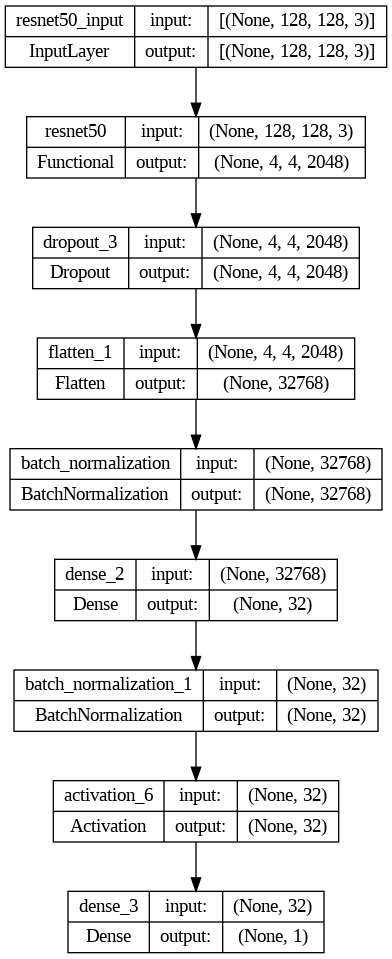

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(modelRes, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

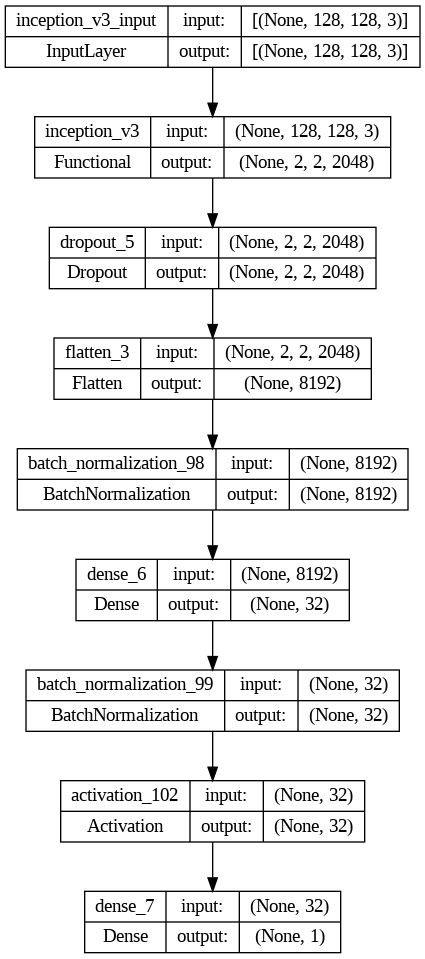

In [61]:
from keras.utils.vis_utils import plot_model
plot_model(modelInceptionV3, to_file='model_plot_Inception.png', show_shapes=True, show_layer_names=True)

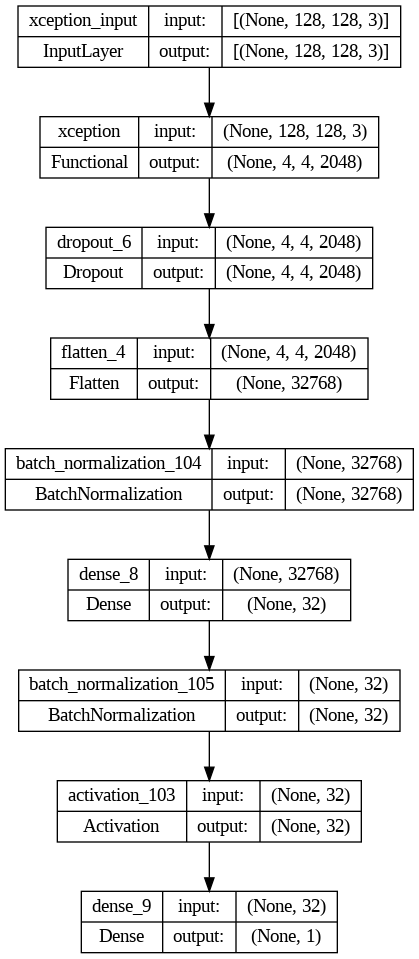

In [62]:
from keras.utils.vis_utils import plot_model
plot_model(modelXception, to_file='model_plot_Xception.png', show_shapes=True, show_layer_names=True)

###5.2 Fit the Deep Learning Models

In [63]:
# List of History
hist_list = []

In [64]:
historyDNN = model.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 22s 149ms/step - loss: 0.6931 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5670 - val_loss: 0.6859 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5700 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 6s 117ms/step - loss: 0.6758 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5623 - val_loss: 0.6712 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5525 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 7s 134ms/step - loss: 0.6695 - accuracy: 0.3992 - precision: 0.3992 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5627 - val_loss: 0.6680 - val_accuracy: 0.4000 - val_precision: 0.4000 - val_recall: 1.0000 - val_auc: 0.5000 - val_get_f1_score: 0.5696 - lr: 0.0100
Epoch 4/50
50/50 [========================

In [65]:
model.save('/content/drive/MyDrive/MidProject_Results/model.h5')
hist_list.append(historyDNN)

In [66]:
historyResNet=modelRes.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 18s 256ms/step - loss: 0.6652 - accuracy: 0.5920 - precision: 0.4903 - recall: 0.5456 - auc: 0.5976 - get_f1_score: 0.4847 - val_loss: 0.6697 - val_accuracy: 0.6000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6591 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 5s 101ms/step - loss: 0.5514 - accuracy: 0.7069 - precision: 0.6597 - recall: 0.5491 - auc: 0.7727 - get_f1_score: 0.5952 - val_loss: 0.6808 - val_accuracy: 0.6000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6677 - val_get_f1_score: 0.0000e+00 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 7s 146ms/step - loss: 0.5136 - accuracy: 0.7473 - precision: 0.7125 - recall: 0.6155 - auc: 0.8147 - get_f1_score: 0.6560 - val_loss: 0.6872 - val_accuracy: 0.6000 - val_precision: 0.5000 - val_recall: 0.0063 - val_auc: 0.7095 - val_get_f1_score: 0.0118 - lr: 0.0100
Epoch 4/50
50/50 [

In [67]:
modelRes.save('/content/drive/MyDrive/MidProject_Results/modelRes.h5')
hist_list.append(historyResNet)

In [68]:
historyVGG = modelVGG.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 23s 347ms/step - loss: 0.6466 - accuracy: 0.6613 - precision: 0.6149 - recall: 0.4063 - auc: 0.6908 - get_f1_score: 0.3526 - val_loss: 0.5171 - val_accuracy: 0.7544 - val_precision: 0.6488 - val_recall: 0.8418 - val_auc: 0.8489 - val_get_f1_score: 0.7164 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 12s 249ms/step - loss: 0.4784 - accuracy: 0.7713 - precision: 0.7027 - recall: 0.7405 - auc: 0.8453 - get_f1_score: 0.7157 - val_loss: 0.5077 - val_accuracy: 0.7443 - val_precision: 0.6183 - val_recall: 0.9430 - val_auc: 0.8860 - val_get_f1_score: 0.7313 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 12s 233ms/step - loss: 0.3902 - accuracy: 0.8250 - precision: 0.7614 - recall: 0.8180 - auc: 0.9043 - get_f1_score: 0.7818 - val_loss: 0.8241 - val_accuracy: 0.5089 - val_precision: 0.4489 - val_recall: 1.0000 - val_auc: 0.8762 - val_get_f1_score: 0.6117 - lr: 0.0100
Epoch 4/50
50/50 [======================

In [69]:
modelVGG.save('/content/drive/MyDrive/MidProject_Results/modelVGG.h5')
hist_list.append(historyVGG)

In [70]:
historyInception=modelInceptionV3.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 29s 224ms/step - loss: 0.6194 - accuracy: 0.6957 - precision: 0.5959 - recall: 0.7392 - auc: 0.7804 - get_f1_score: 0.6088 - val_loss: 0.7284 - val_accuracy: 0.6278 - val_precision: 0.7200 - val_recall: 0.1139 - val_auc: 0.7380 - val_get_f1_score: 0.1697 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 7s 147ms/step - loss: 0.4568 - accuracy: 0.7903 - precision: 0.7022 - recall: 0.8244 - auc: 0.8682 - get_f1_score: 0.7581 - val_loss: 0.4818 - val_accuracy: 0.7797 - val_precision: 0.7591 - val_recall: 0.6582 - val_auc: 0.8497 - val_get_f1_score: 0.6959 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 7s 131ms/step - loss: 0.3524 - accuracy: 0.8534 - precision: 0.7778 - recall: 0.8861 - auc: 0.9294 - get_f1_score: 0.8232 - val_loss: 0.4954 - val_accuracy: 0.7722 - val_precision: 0.6809 - val_recall: 0.8101 - val_auc: 0.8423 - val_get_f1_score: 0.7451 - lr: 0.0100
Epoch 4/50
50/50 [========================

In [71]:
modelInceptionV3.save('/content/drive/MyDrive/MidProject_Results/modelInceptionV3.h5')
hist_list.append(historyInception)

In [72]:
historyXception=modelXception.fit(train_Dataset,validation_data=valid_Dataset,epochs = 50,verbose = 1,callbacks=[lrd,mcp,es])

Epoch 1/50
50/50 [==============================] - 28s 286ms/step - loss: 0.6063 - accuracy: 0.7048 - precision: 0.6189 - recall: 0.6785 - auc: 0.7747 - get_f1_score: 0.6088 - val_loss: 0.5704 - val_accuracy: 0.6987 - val_precision: 0.5852 - val_recall: 0.8481 - val_auc: 0.8150 - val_get_f1_score: 0.6668 - lr: 0.0100
Epoch 2/50
50/50 [==============================] - 11s 217ms/step - loss: 0.4281 - accuracy: 0.8187 - precision: 0.7805 - recall: 0.7595 - auc: 0.8939 - get_f1_score: 0.7621 - val_loss: 0.4759 - val_accuracy: 0.7899 - val_precision: 0.7072 - val_recall: 0.8101 - val_auc: 0.8690 - val_get_f1_score: 0.7534 - lr: 0.0100
Epoch 3/50
50/50 [==============================] - 11s 221ms/step - loss: 0.3143 - accuracy: 0.8800 - precision: 0.8623 - recall: 0.8323 - auc: 0.9517 - get_f1_score: 0.8465 - val_loss: 0.4333 - val_accuracy: 0.8025 - val_precision: 0.7083 - val_recall: 0.8608 - val_auc: 0.8984 - val_get_f1_score: 0.7794 - lr: 0.0100
Epoch 4/50
50/50 [======================

In [73]:
modelXception.save('/content/drive/MyDrive/MidProject_Results/modelXception.h5')
hist_list.append(historyXception)

###6. Evaluation Metrics

###6.1 Evalauting on Training and Validation Data

In [74]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1,model_name):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['Training', 'Validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['Training', 'Validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['Training', 'Validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['Training', 'Validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['Training', 'Validation'])
    plt.show()
    plt.savefig('/content/drive/MyDrive/IR/IR Project/Results/{}.png'.format(model_name), bbox_inches='tight')

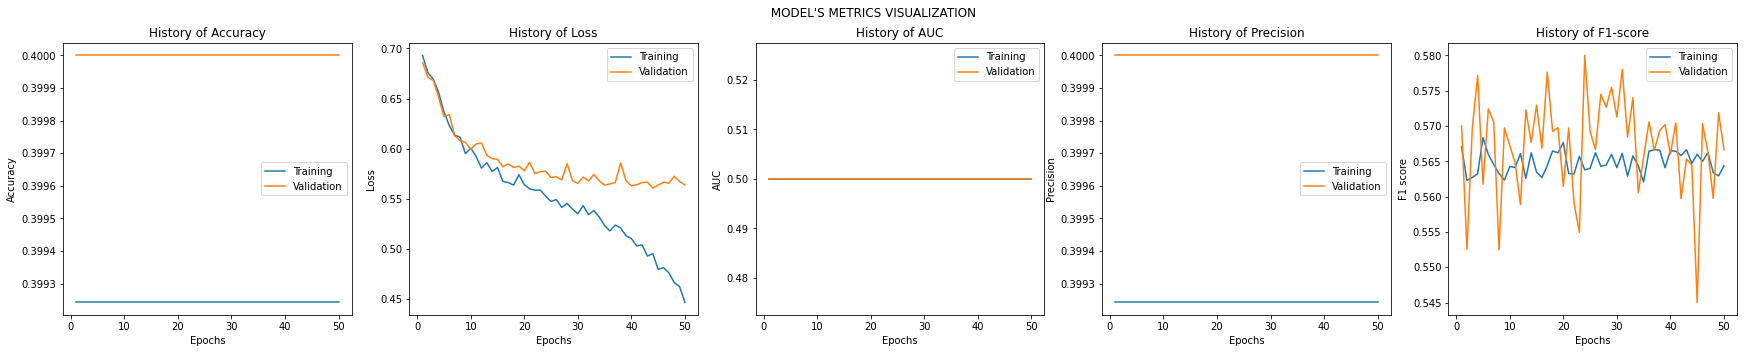

<Figure size 432x288 with 0 Axes>

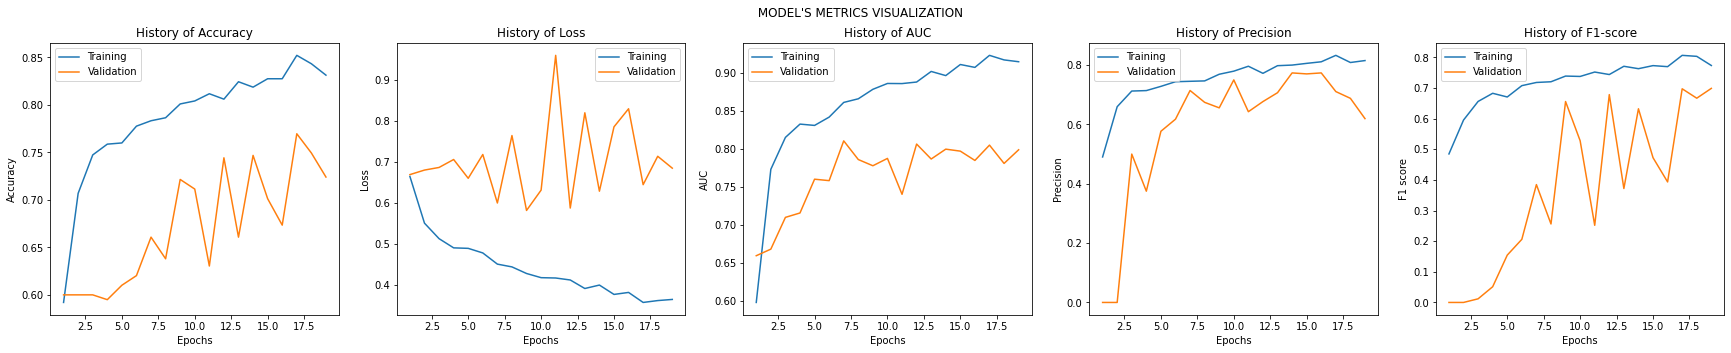

<Figure size 432x288 with 0 Axes>

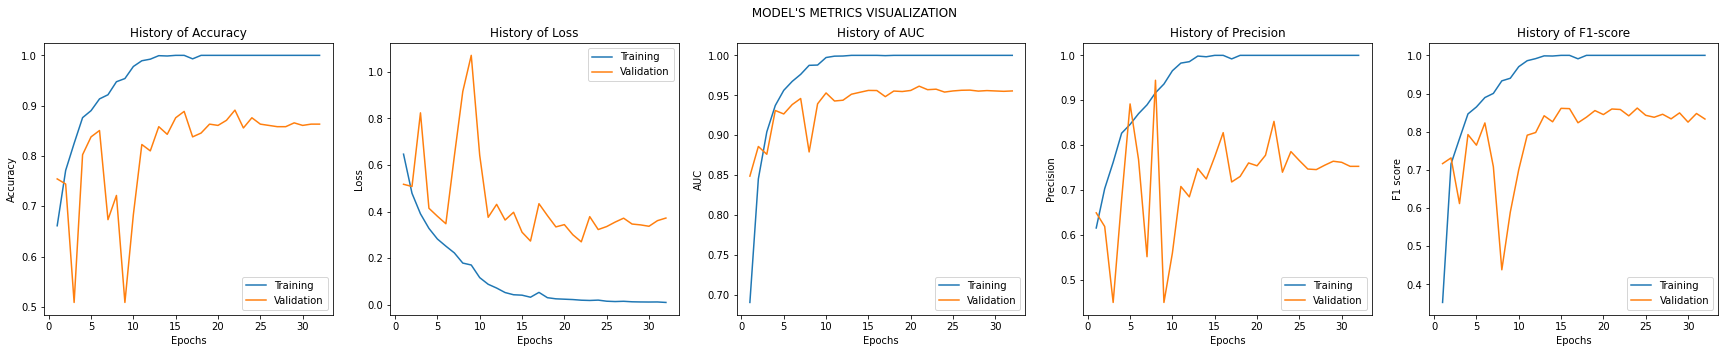

<Figure size 432x288 with 0 Axes>

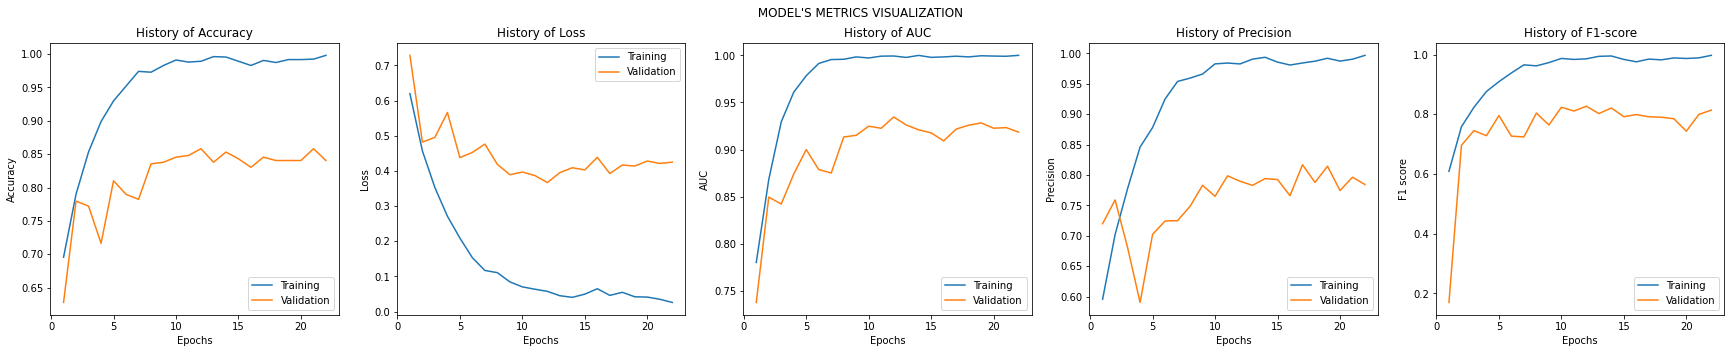

<Figure size 432x288 with 0 Axes>

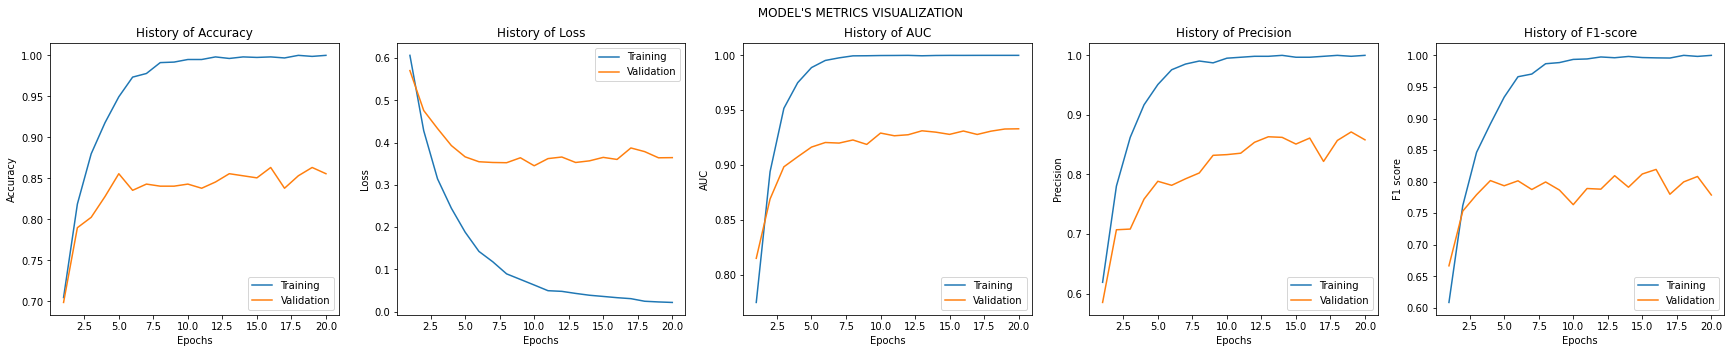

<Figure size 432x288 with 0 Axes>

In [75]:
lst = ['DNN','ResNet','VGG','Inception','Xception']
for i in range(len(lst)):
  history = hist_list[i]
  Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
              history.history['precision'],history.history['val_precision'],
               history.history['get_f1_score'],history.history['val_get_f1_score'],lst[i]
              )


###6.2 Loading the Pre-Trained Model to check the results on Test Data

In [76]:
Xception_load = tf.keras.models.load_model('/content/drive/MyDrive/MidProject_Results/modelXception.h5', custom_objects={"get_f1_score": get_f1_score })

In [77]:
Inception_load = tf.keras.models.load_model('/content/drive/MyDrive/MidProject_Results/modelInceptionV3.h5', custom_objects={"get_f1_score": get_f1_score })

In [78]:
ResNet_load = tf.keras.models.load_model('/content/drive/MyDrive/MidProject_Results/modelRes.h5', custom_objects={"get_f1_score": get_f1_score })

In [79]:
VGG_load = tf.keras.models.load_model('/content/drive/MyDrive/MidProject_Results/modelVGG.h5', custom_objects={"get_f1_score": get_f1_score })

In [80]:
model_load=tf.keras.models.load_model('/content/drive/MyDrive/MidProject_Results/model.h5', custom_objects={"get_f1_score": get_f1_score })

In [81]:
def get_test_metric(test_model):
  res = []
  res = test_model.evaluate(test_Dataset,verbose=2)
  return res

In [82]:
res1 = get_test_metric(Xception_load)

16/16 - 2s - loss: 0.4307 - accuracy: 0.8444 - precision: 0.8538 - recall: 0.7374 - auc: 0.9233 - get_f1_score: 0.7822 - 2s/epoch - 154ms/step


In [83]:
res2 = get_test_metric(Inception_load)

16/16 - 3s - loss: 0.4623 - accuracy: 0.8424 - precision: 0.7913 - recall: 0.8232 - auc: 0.9105 - get_f1_score: 0.7950 - 3s/epoch - 171ms/step


In [84]:
res3 = get_test_metric(ResNet_load)

16/16 - 2s - loss: 0.5896 - accuracy: 0.7152 - precision: 0.6118 - recall: 0.7879 - auc: 0.7981 - get_f1_score: 0.6772 - 2s/epoch - 140ms/step


In [85]:
res4 = get_test_metric(VGG_load)

16/16 - 1s - loss: 0.3703 - accuracy: 0.8545 - precision: 0.7582 - recall: 0.9343 - auc: 0.9584 - get_f1_score: 0.8313 - 1s/epoch - 87ms/step


In [86]:
res5 = get_test_metric(model_load)

16/16 - 1s - loss: 0.5250 - accuracy: 0.4000 - precision: 0.4000 - recall: 1.0000 - auc: 0.5000 - get_f1_score: 0.5756 - 1s/epoch - 68ms/step


In [87]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [88]:
# !unzip '/content/drive/MyDrive/IR/IR Project/Random_Test_Data/depression_set.zip'
# !unzip '/content/drive/MyDrive/IR/IR Project/Random_Test_Data/not_depression_set.zip'

In [89]:
import keras.utils as image

In [90]:
def process_image(image_path):
    img = Image.open(image_path)
    rgbimg = Image.new("RGB", img.size)
    rgbimg.paste(img)
    img = np.array(rgbimg).reshape(-1, 128, 128, 3)
    return img

In [91]:
from PIL import Image

In [92]:
# # image path
# img_path = '/content/depression_set/11.jpg' 

# # Load a single image
# new_image = process_image(img_path)

# # Check prediction
# predictions = (VGG_load.predict(new_image) > 0.5).astype("int32")


In [93]:
# predictions[0][0]

In [94]:
# img_path = '/content/not_depression_set/42.jpg' 

# # Load a single image
# new_image = process_image(img_path)

# # Check prediction
# predictions = (VGG_load.predict(new_image) > 0.5).astype("int32")

In [95]:
# predictions


###7. GRAD-CAM Visualisation

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [97]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

In [98]:
import keras.utils as image

In [99]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [107]:
import keras.utils as image

In [108]:
# image path
img_path = '/content/content/processed_data/test/depression/100.jpg'   
new_image = load_image(img_path)

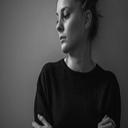

In [109]:
display(Image(img_path))

In [110]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 1s 977ms/step
Predicted: [('n03595614', 'jersey', 7.4512253)]


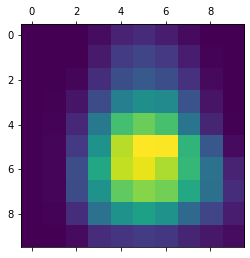

In [111]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-112-34e0b9574523>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


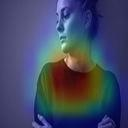

In [112]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)